# Análisis del Gusto Musical y Predicción de Éxitos por Década
## Diego Alexis Ampuero García 21.207.118-8 y Joaquin Antonio Durán Bravo 21.043.653-7

### Objetivo del trabajo:


1. Predecir las canciones que son hits en décadas distintas
2. Identificar cambios significativos en el gusto musical

Para el objetivo 1 se utilizó una regresión logística y para el objetivo 2 se utlizaron las distancias euclidianas entre las características signifiticas de las décadas (danceability, energy, valence, tempo, acousticness y loudness)





### El código sirve para revisar las siguientes actividades

1. Missing Data
2. Outliers
3. Descripción Univariada
4. Descripción Bivariada

Para de esta forma se pueda hacer un pequeño análisis de algunas tendecias de estas carácteristicas significativas.


Saving Dataset Spotify.xlsx to Dataset Spotify.xlsx
Missing Data
track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
decada              0
dtype: int64
Outliers y Descripción Univariada
Resumen por década:

Estadísticas de 'danceability' por década:

         count  mean   std   min   25%   50%   75%   max
decada                                                  
1960    8642.0  0.49  0.16  0.00  0.38  0.50  0.61  0.92
1970    7766.0  0.53  0.16  0.06  0.42  0.53  0.65  0.96
1980    6908.0  0.56  0.17  0.07  0.46  0.58  0.69  0.99
1990    5520.0  0.57  0.18  0.06  0.45  0.59  0.70  0.98
2000    5872.0  0.54  0.19  0.06  0.42  0

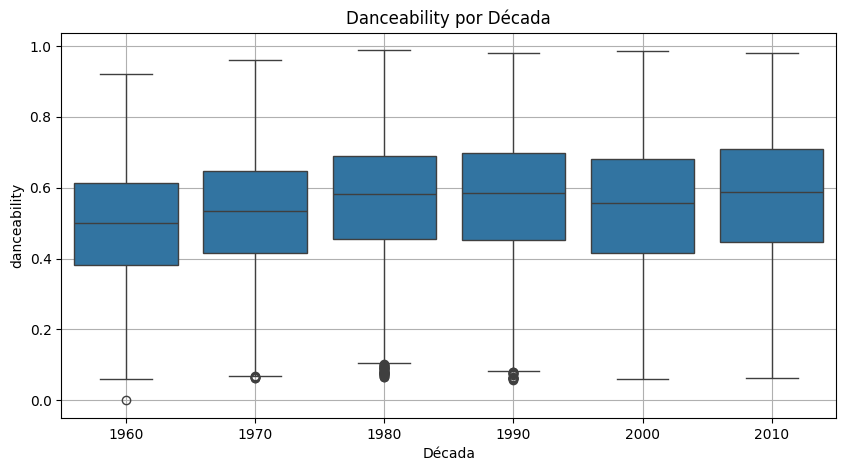

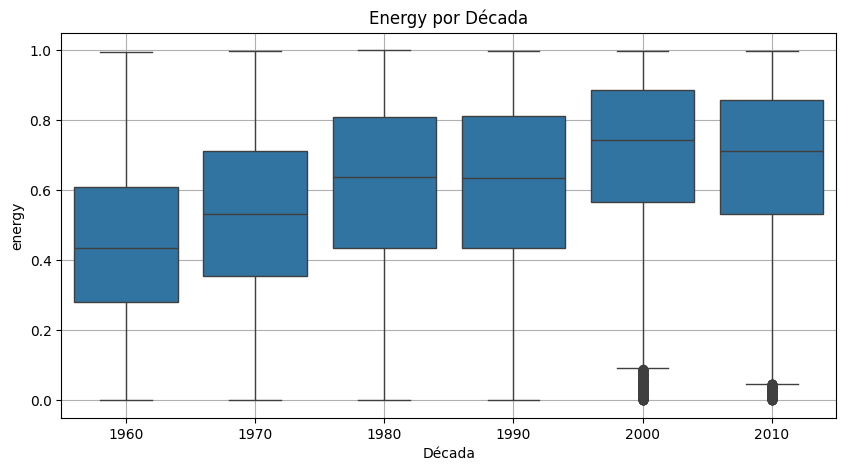

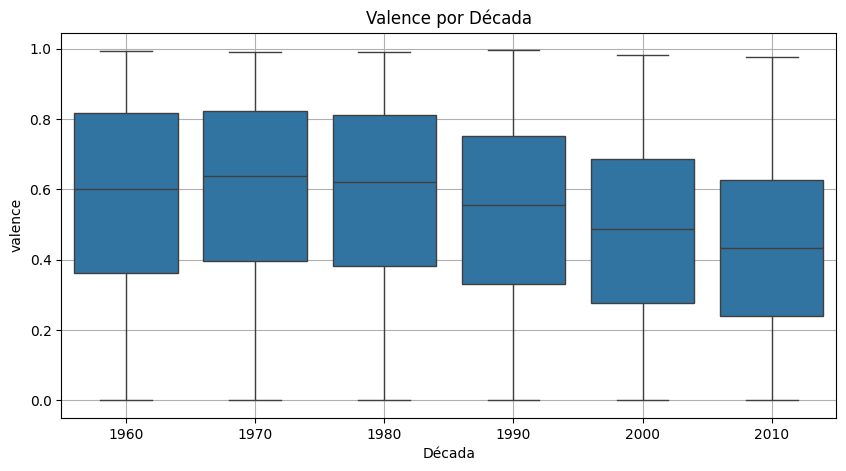

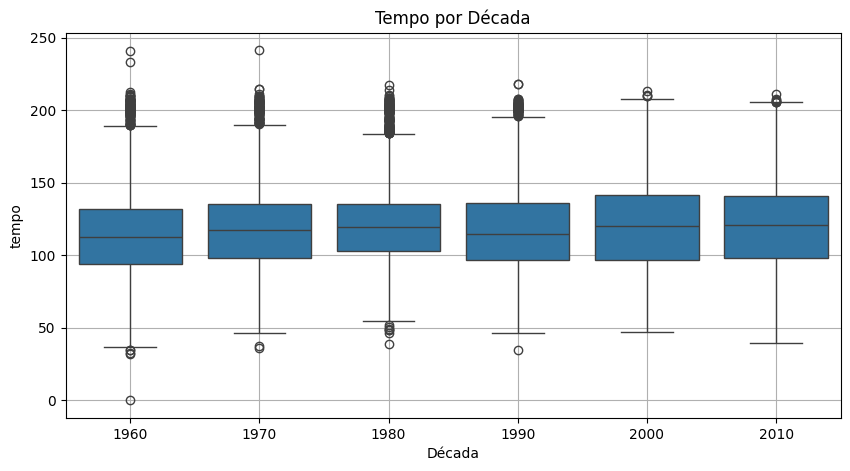

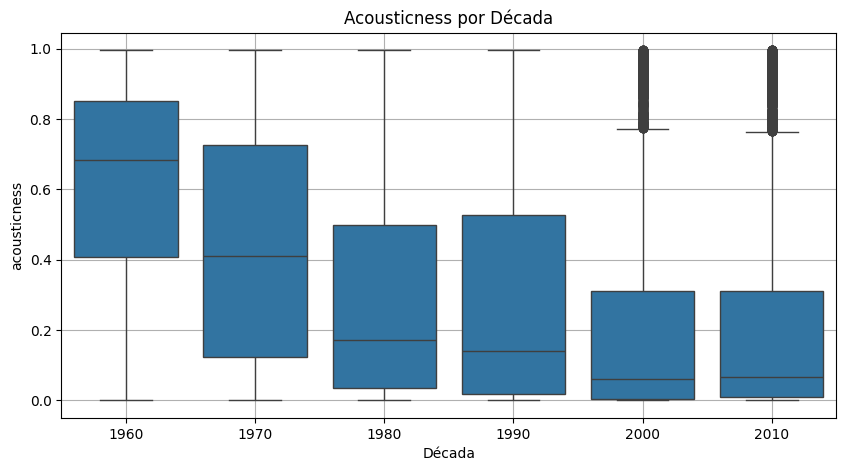

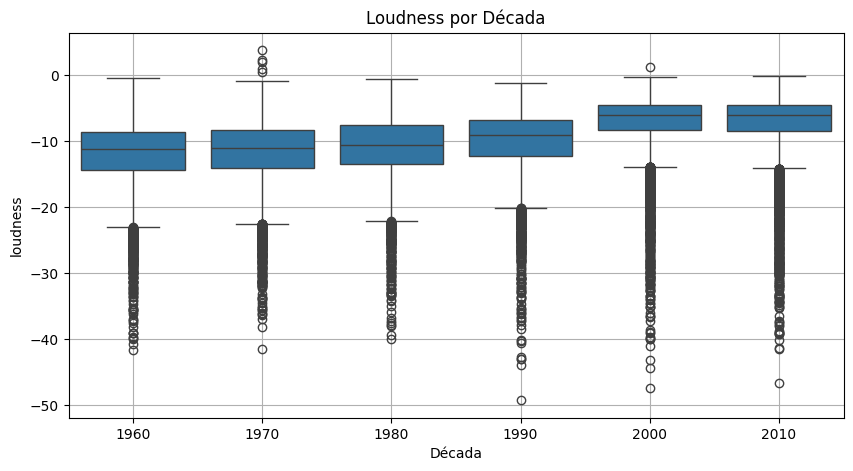


Dispersión de 'danceability' por década:
         std   iqr  rango
decada                   
1960    0.16  0.23   0.92
1970    0.16  0.23   0.90
1980    0.17  0.23   0.92
1990    0.18  0.25   0.92
2000    0.19  0.27   0.93
2010    0.19  0.26   0.92

Dispersión de 'energy' por década:
         std   iqr  rango
decada                   
1960    0.22  0.33   0.99
1970    0.24  0.36   1.00
1980    0.24  0.37   1.00
1990    0.25  0.38   1.00
2000    0.24  0.32   1.00
2010    0.24  0.32   1.00

Dispersión de 'valence' por década:
         std   iqr  rango
decada                   
1960    0.27  0.45   0.99
1970    0.27  0.43   0.99
1980    0.26  0.43   0.99
1990    0.26  0.42   1.00
2000    0.25  0.41   0.98
2010    0.25  0.39   0.98

Dispersión de 'tempo' por década:
          std    iqr   rango
decada                      
1960    29.21  38.20  241.01
1970    28.38  36.74  205.69
1980    27.11  32.57  178.39
1990    29.49  39.57  183.41
2000    30.18  44.51  166.48
2010    29.85  42.99  1

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("Dataset Spotify.xlsx")

print("Missing Data")
print(df.isnull().sum())

print("Outliers y Descripción Univariada")
df['decada'] = df['decada'].astype(str)

variables=['danceability', 'energy', 'valence', 'tempo', 'acousticness', 'loudness']

print("Resumen por década:")
for var in variables:
    print(f"\nEstadísticas de '{var}' por década:\n")
    print(df.groupby('decada')[var].describe().round(2))
for var in variables:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x='decada', y=var)
    plt.title(f"{var.capitalize()} por Década")
    plt.xlabel("Década")
    plt.ylabel(var)
    plt.grid(True)
    plt.show()
for var in variables:
    print(f"\nDispersión de '{var}' por década:")
    dispersion = df.groupby('decada')[var].agg(
        std='std',
        iqr=lambda x: x.quantile(0.75) - x.quantile(0.25),
        rango=lambda x: x.max() - x.min()
    ).round(2)
    print(dispersion)

print("Descripción Bivariada")
variables = ['danceability', 'energy', 'valence', 'tempo', 'acousticness', 'loudness', 'target']
correlaciones = {}

for dec in sorted(df['decada'].unique()):
    df_dec = df[df['decada'] == dec]
    corr = df_dec[variables].corr()['target'].drop('target')
    correlaciones[dec] = corr

correlaciones_df = pd.DataFrame(correlaciones).T.round(3)
print("Correlación por década con target:\n")
print(correlaciones_df)


Código para la Regresión Logística,  para predecir si una canción será un hit o no por década, usando características musicales como predictores.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Variables predictoras y objetivo
variables = ['danceability', 'energy', 'valence', 'tempo', 'acousticness', 'loudness']

# Recorrer cada década
for dec in sorted(df['decada'].unique()):
    print(f"\nResultados para la década de {dec}:")

    # Filtrar datos por década
    df_dec = df[df['decada'] == dec]

    X = df_dec[variables]
    y = df_dec['target']

    # Escalar variables
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Dividir datos
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    # Modelo de regresión logística
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Resultados
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
    print(classification_report(y_test, y_pred))

    coef = pd.Series(model.coef_[0], index=variables)
    print("Coeficientes del modelo:\n", coef.sort_values(ascending=False))


Resultados para la década de 1960:
Accuracy: 0.637
              precision    recall  f1-score   support

           0       0.66      0.56      0.61      1298
           1       0.62      0.71      0.66      1295

    accuracy                           0.64      2593
   macro avg       0.64      0.64      0.63      2593
weighted avg       0.64      0.64      0.63      2593

Coeficientes del modelo:
 loudness        0.636171
valence         0.366454
tempo           0.127569
danceability    0.122036
energy         -0.218941
acousticness   -0.321827
dtype: float64

Resultados para la década de 1970:
Accuracy: 0.647
              precision    recall  f1-score   support

           0       0.66      0.61      0.63      1172
           1       0.63      0.69      0.66      1158

    accuracy                           0.65      2330
   macro avg       0.65      0.65      0.65      2330
weighted avg       0.65      0.65      0.65      2330

Coeficientes del modelo:
 loudness        0.546121


### Análisis variable Y2: Cambio del gusto musical por década
### Y2: 1 si la canción pertenece a una década con un perfil musical significativamente diferente a la anterior, 0 si el perfil de la canción es similar a la tendencia anterior

Saving Dataset Spotify.xlsx to Dataset Spotify (4).xlsx
Cambio significativo en danceability entre 1970 y 1980
Cambio significativo en energy entre 1970 y 1980
Cambio significativo en tempo entre 1970 y 1980
Cambio significativo en acousticness entre 1970 y 1980
Cambio significativo en loudness entre 1970 y 1980
Cambio significativo en valence entre 1980 y 1990
Cambio significativo en tempo entre 1980 y 1990
Cambio significativo en loudness entre 1980 y 1990
Cambio significativo en danceability entre 1990 y 2000
Cambio significativo en energy entre 1990 y 2000
Cambio significativo en valence entre 1990 y 2000
Cambio significativo en tempo entre 1990 y 2000
Cambio significativo en acousticness entre 1990 y 2000
Cambio significativo en loudness entre 1990 y 2000
Cambio significativo en danceability entre 2000 y 2010
Cambio significativo en energy entre 2000 y 2010
Cambio significativo en valence entre 2000 y 2010


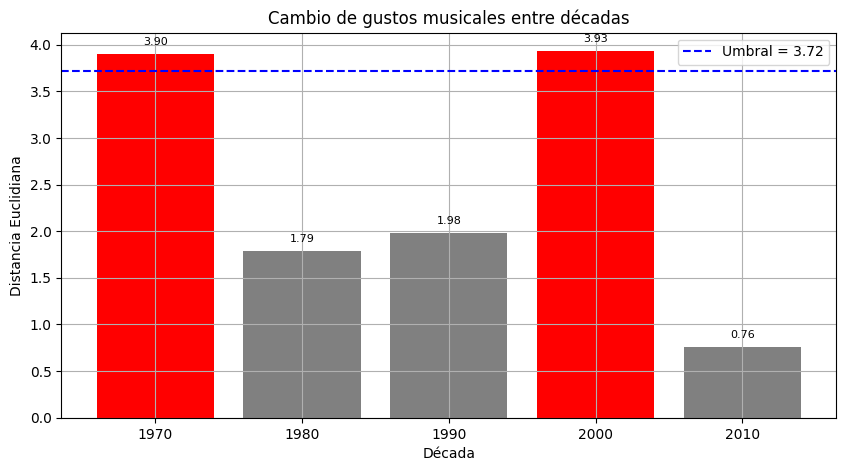

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from scipy.stats import ttest_ind

df = pd.read_excel("Dataset Spotify.xlsx")

# Calculo de las medias por década
df_means = df.groupby('decada')[['danceability', 'energy', 'valence', 'tempo', 'acousticness', 'loudness']].mean()
df_change = df_means.diff()


# Calculo del umbral estadístico basado en la distancia euclidiana, para saber si hubo un cambio significativo
df_means = df.groupby('decada')[features].mean()

distancias = []
for i in range(1, len(df_means)):
    d = euclidean(df_means.iloc[i], df_means.iloc[i - 1])
    distancias.append(d)

umbral = np.mean(distancias) + np.std(distancias)

cambios = [1 if d > umbral else 0 for d in distancias]

# Umbral para comparar con p-value
for d1, d2 in zip(decadas[:-1], decadas[1:]):
    for feature in features:
        vals1 = df[df['decada'] == d1][feature]
        vals2 = df[df['decada'] == d2][feature]
        _, p = ttest_ind(vals1, vals2)
        if p < 0.05:
            print(f"Cambio significativo en {feature} entre {d1} y {d2}")

# Visualización del gráfico
decadas = df_means.index[1:]  # pares de comparación
colores = ['red' if d > umbral else 'gray' for d in distancias]

plt.figure(figsize=(10, 5))
plt.bar(decadas.astype(str), distancias, color=colores)
for i, d in enumerate(distancias):
    plt.text(i, d + 0.1, f"{d:.2f}", ha='center', fontsize=8)

plt.axhline(y=umbral, color='blue', linestyle='--', label=f'Umbral = {umbral:.2f}')
plt.xlabel("Década")
plt.ylabel("Distancia Euclidiana")
plt.title("Cambio de gustos musicales entre décadas")
plt.legend()
plt.grid(True)
plt.show()

## Análisis Regresión Logística


*   **Década 1960 Accuracy de 0.637**: El classification report para esta década mostró un rendimiento equilibrado en la
identificación de hits y no-hits. La precisión para predecir "no hits" fue del 66%, con un recall del 56%. Para los "hits", la precisión fue del 62% y el recall del 71%. Esto indica que el modelo fue ligeramente mejor identificando canciones que realmente eran hits (mayor recall para la clase 1), aunque con una ligera menor precisión comparado con la predicción de no-hits.
##### Los coeficientes del modelo indicaron que variables como loudness (0.636) y valence (0.366) tuvieron una mayor influencia positiva en la probabilidad de ser un hit. Esto sugiere que en los años 60, las canciones más "fuertes" y "positivas" tenían una mayor probabilidad de ser éxitos. Por otro lado, energy (-0.219) y especialmente acousticness (-0.322) se asociaron negativamente, implicando que las canciones con menor energía o más acústicas tendían menos a ser hits en esta década.

*   **Década de 1970 Accuracy de 0.647**: En la década de 1970, el modelo de regresión logística presentó un accuracy
ligeramente superior al de los 60. El classification report muestra que el modelo tuvo una precisión del 66% para predecir "no hits" con un recall del 61%, mientras que para los "hits" la precisión fue del 63% con un recall del 69%. Similar a la década anterior, el modelo fue un poco más efectivo identificando canciones que realmente eran hits.
##### El análisis de los coeficientes revela un cambio interesante en la relevancia de algunas variables. Si bien loudness (0.546) continuó siendo un predictor positivo importante, danceability (0.444) aumentó notablemente su influencia positiva, superando a valence (0.078) que disminuyó su impacto. Por otro lado, acousticness (-0.515) se convirtió en un predictor negativo aún más fuerte que en los 60, y energy (-0.276) mantuvo su asociación negativa. Esto sugiere que en los 70, las canciones exitosas tendían a ser más bailables y menos acústicas en comparación con la década anterior


*   **Década de 1980 Accuracy de 0.71**: La década de 1980 muestra una mejora significativa en el accuracy del modelo predictivo, alcanzando un 71%. El classification report indica un rendimiento más equilibrado y consistentemente bueno para ambas clases: precisión del 71% y recall del 68% para "no hits", y precisión del 71% y recall del 74% para "hits". El modelo en los 80 fue más robusto en general para identificar tanto hits como no-hits.
##### Los coeficientes del modelo para los 80 destacan la creciente importancia de loudness (0.744) y danceability (0.688), que se consolidan como los predictores positivos más fuertes. Esto refuerza la tendencia observada en los 70 hacia éxitos más potentes y bailables. valence (0.101) y tempo (0.135) mantuvieron una influencia positiva, aunque menor. Notablemente, acousticness (-0.592) y energy (-0.592) presentaron coeficientes negativos de magnitud considerable y muy similar, sugiriendo que tanto la falta de energía como un sonido más acústico se volvieron fuertes indicadores negativos de ser un hit en esta década.

*   **Década de 1990 Accuracy de 0.772**: En la década de 1990, el accuracy del modelo predictivo continuó mejorando significativamente, alcanzando un 77.2%. El classification report indica un rendimiento sólido y bastante equilibrado para ambas clases: precisión del 80% y recall del 73% para "no hits", y precisión del 75% y recall del 81% para "hits". Esto sugiere que el modelo fue aún más efectivo para identificar tanto los éxitos como las canciones que no lo fueron en esta década.
##### Los coeficientes del modelo para los 90 muestran un claro dominio de danceability (1.340) y loudness (1.166) como los predictores positivos más fuertes, con coeficientes de magnitud considerablemente mayor que en décadas anteriores. Esto subraya la importancia creciente de las canciones bailables y con un sonido potente en esta época. tempo (0.118) mantuvo una ligera influencia positiva. Por otro lado, valence (-0.403) invirtió su signo y se convirtió en un predictor negativo, y energy (-0.665) y acousticness (-0.894) se mantuvieron como fuertes predictores negativos, con acousticness mostrando el coeficiente negativo de mayor magnitud hasta ahora.Estos resultados sugieren que en los 90, los éxitos tendían a ser muy bailables, potentes, menos acústicos, y con un componente de valencia menos positivo que en décadas previas.



*   **Década de 2000 Accuracy de 0.775:** La década de 2000 mantuvo un accuracy alto en el modelo predictivo, con un 77.5%, similar al de los 90. El classification report muestra un rendimiento equilibrado y robusto para ambas clases: precisión del 78% y recall del 75% para "no hits", y precisión del 77% y recall del 80% para "hits". Esto indica que el modelo continuó siendo efectivo en la predicción de éxitos en esta década.
##### Los coeficientes del modelo para los 2000 presentan un cambio drástico en la influencia de loudness (2.909), que se dispara como el predictor positivo más fuerte con un coeficiente mucho mayor que en cualquier década anterior. danceability (1.028) se mantuvo como un predictor positivo importante, aunque su coeficiente es ligeramente menor que en los 90. valence (0.099) y tempo (0.054) volvieron a tener una pequeña influencia positiva. Por otro lado, acousticness (-0.524) continuó siendo un predictor negativo, y energy (-1.722) aumentó significativamente su coeficiente negativo, convirtiéndose en un fuerte indicador de no ser un hit. Estos resultados sugieren que en los 2000, los éxitos se caracterizaron fuertemente por ser muy potentes en volumen, mantener la tendencia a ser bailables, y ser marcadamente menos enérgicos en comparación con las canciones que no alcanzaron el estatus de hit.

*   **Década de 2010 Accuracy de 0.764**: En la década de 2010, el accuracy del modelo se mantuvo alto, aunque ligeramente inferior al de las dos décadas precedentes, registrando un 76.4%. El classification report muestra un rendimiento robusto: precisión del 79% y recall del 72% para "no hits", y precisión del 74% y recall del 81% para "hits". Similar a décadas anteriores, el modelo fue más eficaz en la identificación de hits verdaderos (mayor recall para la clase 1).
##### Los coeficientes del modelo para los 2010 indican que loudness (2.547) continuó siendo el predictor positivo más fuerte, aunque su coeficiente disminuyó ligeramente en comparación con los 2000. danceability (0.650) siguió siendo un predictor positivo relevante, aunque su coeficiente también se redujo. tempo (0.062) y valence (0.055) mantuvieron una influencia positiva marginal. acousticness (-0.393) continuó como predictor negativo, mientras que energy (-1.655) se mantuvo como un fuerte predictor negativo, con una magnitud de coeficiente similar a la de los 2000. Estos resultados sugieren que en los 2010, los éxitos todavía se caracterizaron por ser potentes en volumen y tener características bailables, pero con una ligera disminución en la importancia predictiva de ambas en comparación con los 2000, mientras que la falta de energía siguió siendo un fuerte indicador de no ser un hit.

## Análisis Variable Y2 Identificación de Cambios Significativos en el Gusto Musical por Década
Además de analizar las características de los éxitos individuales, este estudio busca identificar si ha habido momentos específicos en la historia reciente de la música donde el "gusto musical promedio" o el "perfil sonoro" dominante ha experimentado un cambio significativo o una disrupción notable entre décadas consecutivas. Para abordar esta cuestión, se definió una variable binaria, denominada Y2, con el siguiente criterio:

*   Y2 = 1: Si el perfil musical promedio de una década presenta diferencias estadísticamente significativas respecto al perfil de la década inmediatamente anterior.
*   Y2 = 0: Si el perfil musical promedio de una década es similar a la tendencia de la década anterior, sin cambios disruptivos evidentes.

###  Propósito de la variable
**Simplificar la Identificación de cambios:** En lugar de analizar individualmente el cambio de cada característica musical (danceability, energy, etc.) entre todas las pares de décadas, la variable Y2 consolida esta información para indicar cuándo el "paquete" general de características promedio de una década se desvía considerablemente del de la anterior. Actúa como un indicador resumen de un posible "cambio de era" en el gusto musical dominante.

### Metodología para la Determinación de Y2: Distancia Euclidiana y Umbral Estadístico

Para cuantificar la magnitud del cambio en el perfil musical entre décadas consecutivas, se empleó la distancia euclidiana. Esta medida geométrica permite calcular la "distancia" entre dos puntos en un espacio multidimensional. En nuestro caso, cada punto representa el perfil musical promedio de una década, definido por los valores promedio de las caracteristicas danceability, energy, valence, tempo, acusticness y loudness. El procedimiento fue el siguiente:


1.   **Cálculo de Medias por Década:** Primero, se calcularon los valores promedio de cada una de las seis características musicales para cada década presente en el conjunto de datos.
2.   **Cálculo de la Distancia Euclidiana entre Décadas Consecutivas:** Se calculó la distancia euclidiana entre el vector de medias de una década y el vector de medias de la década inmediatamente anterior. Por ejemplo, se calculó la distancia entre las medias de 1970 y 1960, entre 1980 y 1970, y así sucesivamente. Una distancia mayor indica una mayor diferencia en el perfil musical promedio entre esas dos décadas.
3. **Establecimiento de un Umbral Estadístico:** Para determinar cuándo una distancia euclidiana representaba un "cambio significativo" y no solo una variación aleatoria, se estableció un umbral. Este umbral se calculó automáticamente a partir de las distancias euclidianas observadas entre todas las pares de décadas consecutivas. Específicamente, el umbral se fijó como la media de todas las distancias euclidianas calculadas, más una desviación estándar de esas distancias.
4. **Clasificación de Décadas (Asignación de Y2):** Se consideró que una década marcó un cambio significativo (Y2 = 1) si la distancia euclidiana entre su perfil musical promedio y el de la década anterior superó el umbral establecido. Si la distancia fue igual o menor al umbral, se consideró que el cambio fue gradual o no significativo (Y2 = 0).



## Interpretación del Umbral (3,72):

El umbral calculado de 3.72, derivado automáticamente del análisis de las distancias observadas, representa una desviación estándar por encima de la distancia promedio entre décadas. Una distancia euclidiana que supera este valor se considera inusualmente grande dentro del contexto de este conjunto de datos, lo que justifica la interpretación de que hubo un cambio significativo en el gusto musical entre los años comparados.


### Análisis de resultados
Se calculó la distancia euclidiana entre los promedios de variables musicales clave (danceability, energy, valence, tempo, acousticness, loudness) por década. Esta distancia representa cuán diferentes son los gustos musicales entre dos décadas consecutivas.


*   **Cambio Significativo entre 1960 y 1970:** La barra que representa la transición de los 60 a los 70 claramente supera el umbral. Esto indica que el perfil musical promedio de la década de 1970 fue significativamente diferente al de la década de 1960. Como se mencionó en los análisis univariados, este periodo estuvo marcado por cambios notables en varias características musicales, lo que se consolida aquí como una disrupción general en el gusto.


*   **Estabilidad Relativa entre 1970 y 1980, y entre 1980 y 1990:** Las distancias euclidianas para estas transiciones no superan el umbral. Esto sugiere que, si bien hubo evolución dentro de los géneros musicales, el perfil musical promedio de las canciones no experimentó un cambio tan drástico en estas décadas en comparación con la transición anterior. La evolución del gusto fue más gradual.


*   Segundo Cambio Significativo entre 1990 y 2000: Similar a la transición de los 60 a los 70, la barra correspondiente al cambio de los 90 a los 2000 también supera el umbral. Esto señala otro momento de disrupción importante, donde el perfil musical promedio de los 2000 fue significativamente distinto al de los 90. Los análisis univariados y bivariados (correlaciones) ya habían sugerido cambios en la importancia de ciertas características, lo cual se refleja aquí como un cambio generalizado.
*  Estabilidad Relativa entre 2000 y 2010: La distancia para esta transición se mantiene por debajo del umbral. Esto indica que el perfil musical promedio de la década de 2010 fue más similar al de los 2000, sugiriendo una evolución más gradual en el gusto musical durante este periodo.
### Análisis p-value
El análisis complementario basado en las pruebas t independientes (p < 0.05) refuerza estos hallazgos. Se encontraron cambios significativos en múltiples características musicales específicamente entre las décadas de 1960-1970 y 1990-2000. La concordancia entre el método de la distancia euclidiana (superando el umbral) y las pruebas de hipótesis (p-value) valida la identificación de estos dos periodos como momentos clave de transformación en el gusto musical.

### Conclusiones
Basado en el análisis de la variable Y2, se concluye que el gusto musical ha experimentado cambios significativos a lo largo de las décadas, pero de manera no uniforme. Se identifican dos periodos principales de disrupción o cambio abrupto:



*   La transición de la década de 1960 a 1970, marcando una clara desviación del sonido predominante de los 60..
*   La transición de la década de 1990 a 2000, indicando una transformación significativa en el perfil musical promedio al entrar el nuevo milenio.
*   En las transiciones entre 1970-1980, 1980-1990 y 2000-2010, si bien hubo evolución, el perfil musical promedio se mantuvo relativamente más estable, sin alcanzar el umbral de cambio significativo definido en este análisis. Estos hallazgos sugieren que ciertas décadas actuaron como puntos de inflexión, redefiniendo las características del sonido musical dominante para los años
venideros.







